<a href="https://colab.research.google.com/github/shahzadahmad7/SupervisedLearningAlgorithems/blob/main/ForestTree_inpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
path="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [5]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [7]:
dataset = pd.read_csv(path, names=headernames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.30)

In [10]:
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


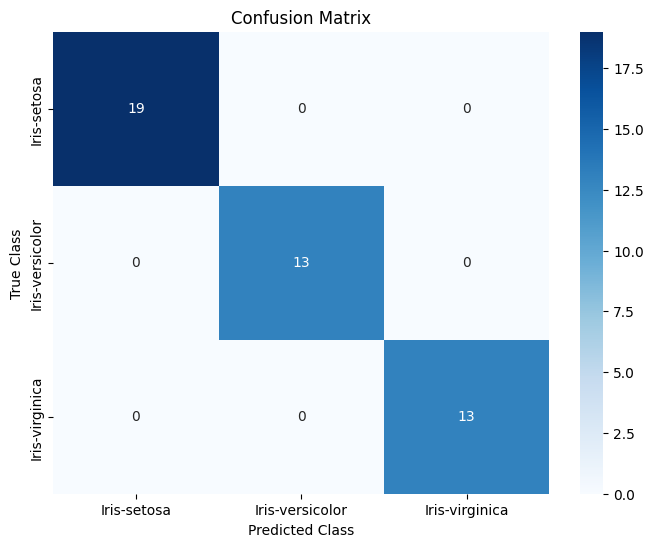

In [13]:
# Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(result, annot=True, cmap="Blues", fmt="d", xticklabels=dataset['Class'].unique(), yticklabels=dataset['Class'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

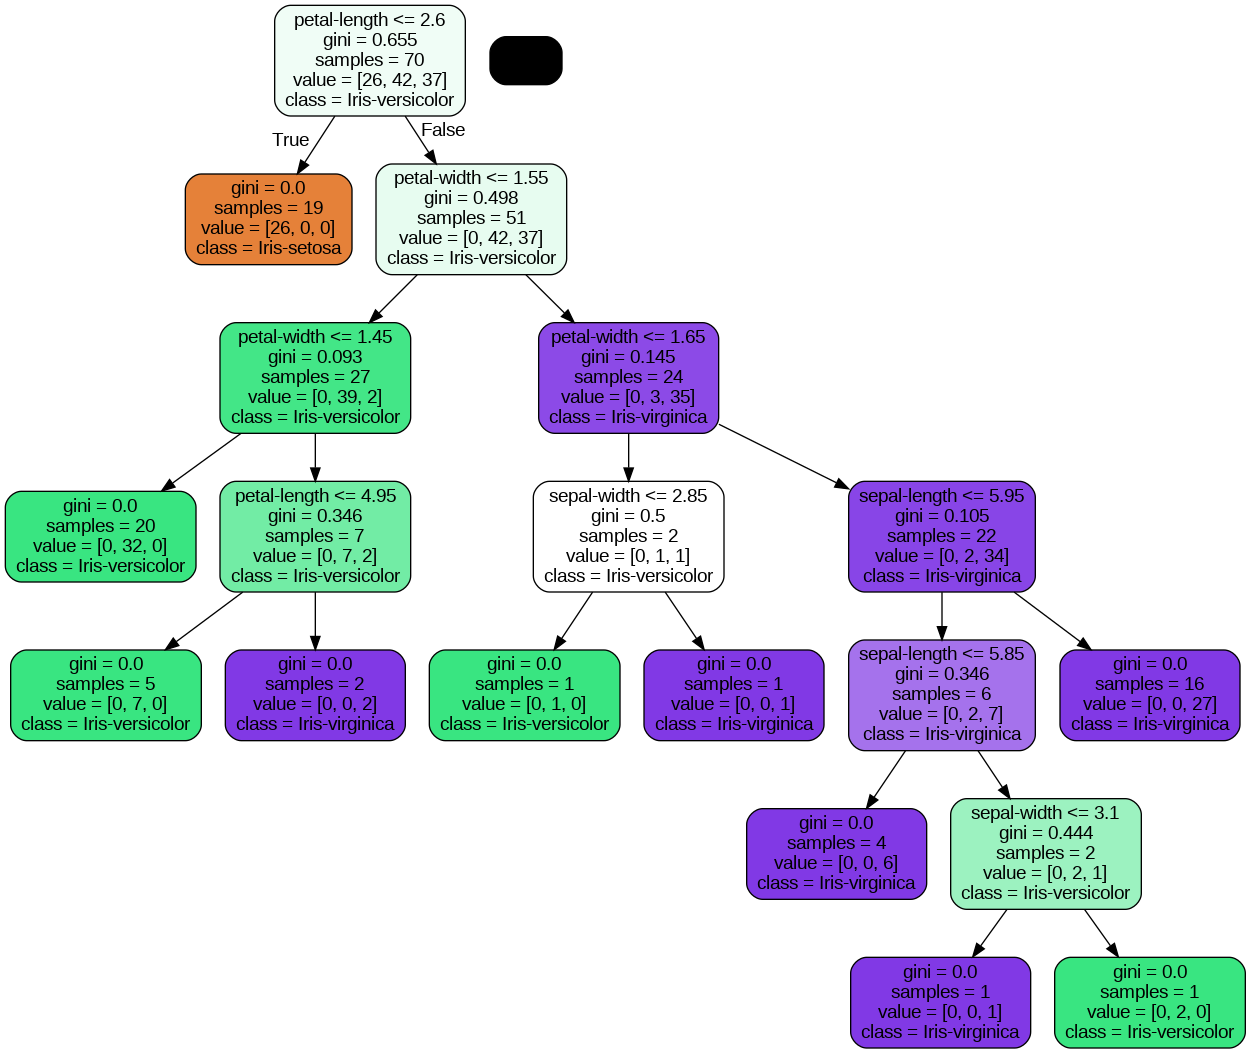

In [20]:
from sklearn.tree import export_graphviz
import graphviz
import pydot

# Plotting the feature importances
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = dataset.columns[:-1]
sorted_feature_names = feature_names[indices]

# Plot graph using Graphviz
dot_data = export_graphviz(classifier.estimators_[0], out_file=None, feature_names=feature_names,
                           class_names=classifier.classes_, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_pdf("random_forest_tree.pdf")

# Display the graph in Colab
from IPython.display import Image
Image(graph[0].create_png())

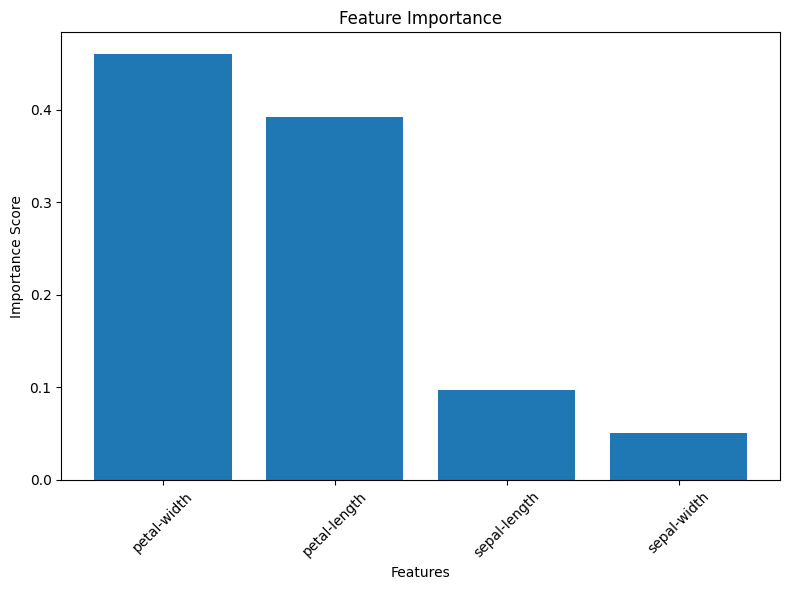

In [21]:
# Plot the graph
plt.figure(figsize=(8, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()